# Find poles: single channel

In [1]:
using Plots

In [8]:
function amp(s)
    m = 2.5;
    g = 1.1;
    K = g^2/(m^2 - s)
    ρ = sqrt(1.-1./s);
    #
    K/(1-1.0im*ρ*K)
end

amp (generic function with 1 method)

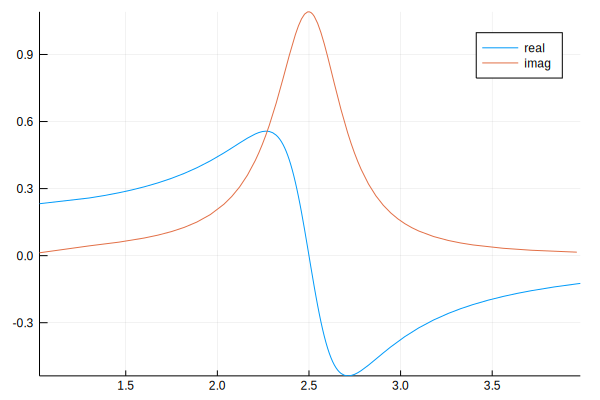

In [9]:
plot(e->real(amp(e^2)), 1, 4, lab="real")
plot!(e->imag(amp(e^2)), 1, 4, lab="imag")

### Plot the second sheet
Actually, in this case everything is at the first sheet

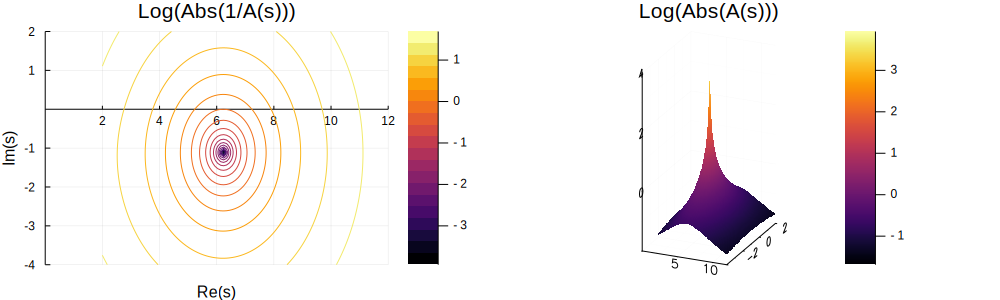

In [44]:
let sxv = linspace(2, 12,100), syv = linspace(-4.0,2, 100)
    cal = [amp(sx+1im*sy) for sy in syv, sx in sxv]
    plot(size=(1000,300),
        contour(sxv, syv, [log(abs(1/v)) for v in cal], levels=20, framestyle=:origin, title="Log(Abs(1/A(s)))",
            xlab="Re(s)", ylab="Im(s)"),
        surface(sxv, syv, [log(abs(v)) for v in cal], levels=20, framestyle=:origin, title="Log(Abs(A(s)))")
        )
end

### Make correct sheet structure

In [73]:
function ampC(s)
    m = 2.5;
    g = 1.1;
    K = g^2/(m^2 - s)
    iρ = sqrt(1.0/s-1);
    #
    K/(1+iρ*K)
end
# for the real value - take it above
ampC(s::Float64) = amp(s+1e-5im)
# second sheet
function ampCII(s)
    iρ = sqrt(1.0/s-1);
    inv_ampI = 1.0/ampC(s)
    inv_ampII = inv_ampI-2iρ
    1.0/inv_ampII
end

ampCII (generic function with 1 method)

### Plot amplitude in different sheets

#### Now, the first sheet does not have any poles
Imaginary part is discontinues

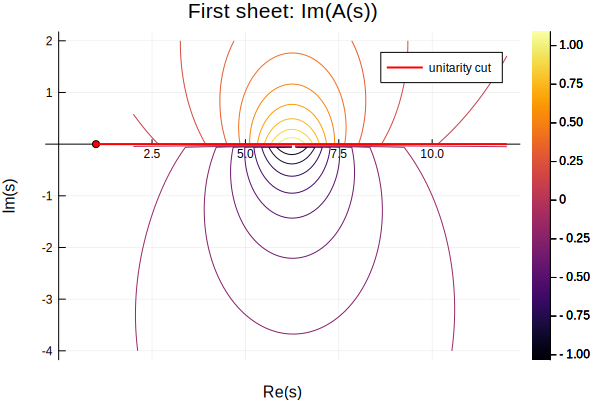

In [82]:
let sxv = linspace(2, 12,100), syv = linspace(-4.0,2, 100)
    cal = [ampC(sx+1im*sy) for sy in syv, sx in sxv]
    contour(sxv, syv, [imag(v) for v in cal], levels=20, framestyle=:origin, title="First sheet: Im(A(s))",
            xlab="Re(s)", ylab="Im(s)");
    scatter!([1],[0],m=(4,:c,:red),lab="")
    plot!([1,12],[0,0],line=(2,:red), lab="unitarity cut")
end

#### The second sheet has the pole and reflection
It is easier to see poles in log scale

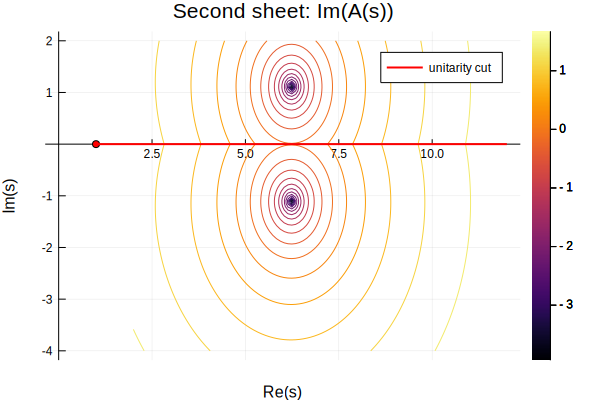

In [83]:
let sxv = linspace(2, 12,100), syv = linspace(-4.0,2, 100)
    cal = [ampCII(sx+1im*sy) for sy in syv, sx in sxv]
    contour(sxv, syv, [log(abs(1/v)) for v in cal], levels=20, framestyle=:origin, title="Second sheet: Im(A(s))",
            xlab="Re(s)", ylab="Im(s)")
    scatter!([1],[0],m=(4,:c,:red),lab="")
    plot!([1,12],[0,0],line=(2,:red), lab="unitarity cut")
end